<a href="https://colab.research.google.com/github/matardy/ML-DataMining-Homeworks/blob/master/notebooks/14_AttentionMechanisms_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14 Attention Mechanisms

### Introduction to Attention Mechanisms

In human cognition, attention is a powerful tool that allows us to focus on specific information while disregarding others. Imagine reading a book in a noisy cafe. Despite the surrounding chatter, your brain concentrates on the text, 'attending' to the book's contents. The concept of attention in deep learning is inspired by this very ability of our brain.

### The Need for Attention in Deep Learning

In the realm of deep learning, especially in tasks that deal with sequences (like translating a sentence from English to French), we often encounter situations where certain parts of the input sequence are more relevant to some parts of the output sequence than others. The traditional models, like Recurrent Neural Networks (RNNs), process sequences step-by-step and often struggle with long sequences. Over long distances, the information from initial steps might get diluted by the time we reach the current step.

Attention mechanisms address this by allowing the network to 'focus' on different parts of the input, depending on the context. In essence, they weigh the importance of different inputs differently, hence directing the model's 'attention' towards more relevant data.

### How Does Attention Work?

At a high level, the attention mechanism computes a set of weights – the attention weights. These weights determine how much focus to place on various parts of the input for a given output. For instance, when translating a sentence, while predicting the next word in the target language, the attention mechanism might focus more on the last two words in the source language.

Mathematically, this involves taking a dot product of the input and output representations, followed by a softmax operation to produce the attention weights. These weights are then used to produce a weighted sum of the input representations, giving us a context vector. This context vector, representative of the input sequence in light of the current output focus, is then used further in the processing.

### Impact and Popularity

Attention mechanisms dramatically improved the capabilities of neural networks in tasks like machine translation. Their success in sequence-to-sequence models led to their widespread adoption in various other domains, such as image captioning, speech recognition, and more.

The true potential of attention was realized with the introduction of the Transformer architecture in the paper "Attention is All You Need" by Vaswani et al. [link](https://arxiv.org/abs/1706.03762). This architecture, relying heavily on self-attention mechanisms, set the stage for state-of-the-art models like BERT, GPT, and many others, which have since dominated the field of Natural Language Processing.

In Conclusion, attention mechanisms have become a cornerstone in modern deep learning architectures. By enabling models to dynamically focus on different parts of the input data based on context, they allow for more flexible and powerful representations, leading to impressive improvements in a wide range of applications.

#### Exercise: Visualizing Attention Mechanisms

Implement and visualize the dot-product attention mechanism using pre-trained embeddings from the spaCy library.

In [ ]:
#Download embeddings from the spaCy library
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 217.9 kB/s eta 0:03:17
     --------------------------------------- 0.0/42.8 MB 281.8 kB/s eta 0:02:32
     --------------------------------------- 0.1/42.8 MB 416.7 kB/s eta 0:01:43
     --------------------------------------- 0.2/42.8 MB 701.4 kB/s eta 0:01:01
     --------------------------------------- 0.2/42.8 MB 885.4 kB/s eta 0:00:49
     ---------------------------------------- 0.4/42.8 MB 1.4 MB/s eta 0:00:31
      --------------------------------------- 0.6/42.8 MB 1.6 MB/s eta 0:00:27
      --------------------------------------- 1.0/42.8 MB 2.4 MB/s eta 0:00:18
     - -------------------------------------- 1.4/42.8 MB 3.1 MB/s eta 0:00:14
     - -------------------------------------- 2.1/42.8 MB 4.3 MB/s eta 0:00:10
     --- ------------------------------------ 3.3/42.8 MB 6.0

Use spaCy to load the en_core_web_md model for pre-trained embeddings

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

Implement the dot-product attention mechanism.

In [ ]:
import numpy as np

def dot_product_attention(query, key, value):
    """Compute the dot product attention scores and return the weighted sum of values."""
    scores = np.dot(query, key.T)
    normalized_scores = scores / np.linalg.norm(scores)
    weights = np.exp(normalized_scores) / np.sum(np.exp(normalized_scores))
    return weights, np.sum(weights[:, np.newaxis] * value, axis=0)

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

In [ ]:

import spacy
import numpy as np

# Load the pre-trained model
nlp = spacy.load('en_core_web_md')

def dot_product_attention(query, keys):
    """Compute attention scores using dot product.

    Args:
    - query (numpy array): Query vector.
    - keys (list of numpy arrays): List of key vectors.

    Returns:
    - attention_scores (numpy array): Normalized attention scores.
    """
    raw_scores = np.array([np.dot(query, key) for key in keys])

    # Normalize using softmax
    attention_scores = np.exp(raw_scores) / np.sum(np.exp(raw_scores))

    return attention_scores

# Test
sentence = "The quick brown fox jumps over the lazy dog."
query_word = "fox"

# Convert the sentence and query word to vectors using spaCy
doc = nlp(sentence)
query_vector = nlp(query_word).vector
key_vectors = [word.vector for word in doc]

attention_scores = dot_product_attention(query_vector, key_vectors)
print(attention_scores)


In [ ]:

import matplotlib.pyplot as plt

def visualize_attention(sentence, attention_scores):
    """Visualize attention scores for each word in the sentence.

    Args:
    - sentence (str): The original sentence.
    - attention_scores (numpy array): Attention scores for each word.
    """
    words = sentence.split()

    plt.figure(figsize=(12, 6))
    plt.bar(words, attention_scores)
    plt.xlabel("Words")
    plt.ylabel("Attention Scores")
    plt.title("Attention Scores for each word")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize the attention scores
visualize_attention(sentence, attention_scores)


Visualize Attention:
    Given a sentence and a query word from that sentence, visualize the attention scores for each word in the sentence with respect to the query word.

In [ ]:
import matplotlib.pyplot as plt

def visualize_attention(sentence, query_word):
    """Visualize attention scores for a given query word within a sentence."""
    tokens = [token for token in nlp(sentence)]
    query_vector = nlp(query_word).vector
    key_values = np.array([token.vector for token in tokens])
    weights, _ = dot_product_attention(query_vector, key_values, key_values)
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(tokens)), weights)
    plt.xticks(range(len(tokens)), [token.text for token in tokens], rotation=45)
    plt.ylabel('Attention Scores')
    plt.title(f'Attention Scores for Query: {query_word}')
    plt.show()

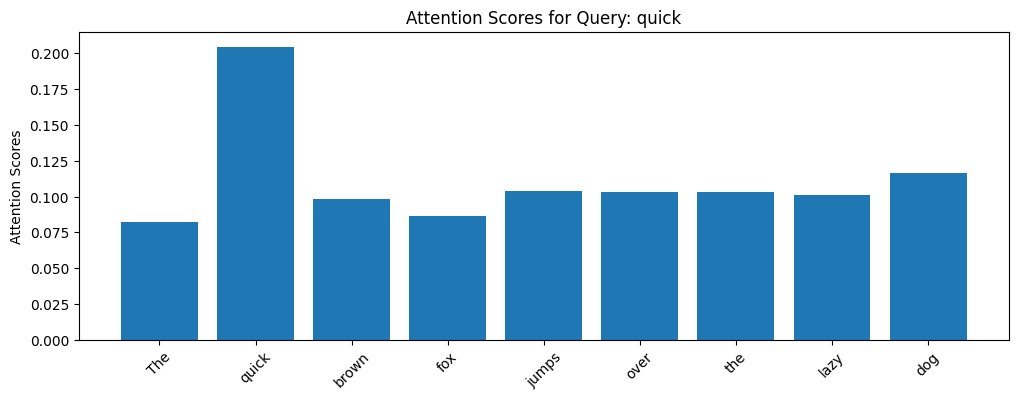

In [ ]:
sentence = "The quick brown fox jumps over the lazy dog"
query_word = "quick"
visualize_attention(sentence, query_word)